# PA 3: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID of the member submitting the assignment: Harshith Pashikanti, 1001974588

Student Name and ID of the remaining members: Venkata Sainath Reddy Palavala, 1001949223


## Submission Instructions


Step 1: Rename this file to 'yourNetID_PA3.ipnyb' and the report file to 'yourNetID_PA3.pdf' <br>

Step 2: Upload all the document separately onto canvas  <br>**Not in a zip file. 20 points will be deducted if you don't follow the instruction**  <br>
Note: Your submission should include ONLY the following files: <br>
    * apriory.py  <br>
    * yourNetID_PA3.ipynb  <br> 
    * yourNetID_PA3.pdf  <br> 
    * dataset.csv  <br>
    * toyDS.csv <br>

## Programming Assignment Details

Before you start:
- Note that this is an individual assignment.
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## ** Do Not Delete the Above Cell** <br>
10 points will be deducted if the instructions are not followed


## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
# Import your Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn as sk
import apriori


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


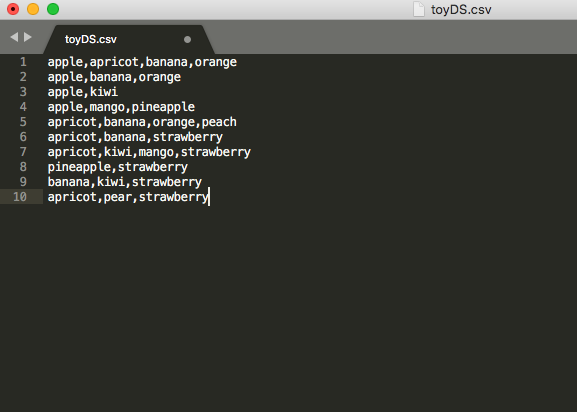

In [3]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [4]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
# Reading the data frame
df_grp=pd.read_csv("dataset_group.csv",names=['Date','Txn_id','Items'])
# The data for the Apriori Algorithm
df_grp['Items'] = df_grp['Items']+','
# grouping data with transcation id and finding its sum
df_grp=df_grp.groupby(['Txn_id']).sum()
# droping of date column
df_grp.drop('Date',axis=1)
#resetting the index values
df_grp.reset_index(inplace = True)
# selecting only items from the transcation
df_grp=df_grp['Items']
##.str.split(',').values.tolist()
df = pd.DataFrame(df_grp)
# exporting to new dataset as dataset.csv
export_dataset=df.to_csv('dataset.csv',sep=',',header=True,index=None,quoting=None)


In [5]:
# # #  Solution  # # #
# loading of data set
df_csv = pd.read_csv('dataset.csv')
# displaying first seven values
df_csv.head(7)


,Items
0,"yogurt,pork,sandwich bags,lunch meat,all- purp..."
1,"toilet paper,shampoo,hand soap,waffles,vegetab..."
2,"soda,pork,soap,ice cream,toilet paper,dinner r..."
3,"cereals,juice,lunch meat,soda,toilet paper,all..."
4,"sandwich loaves,pasta,tortillas,mixes,hand soa..."
5,"laundry detergent,toilet paper,eggs,toilet pap..."
6,"individual meals,paper towels,tortillas,vegeta..."


In [6]:
df_grp=pd.read_csv("dataset_group.csv",names=['Date','Txn_id','Items'])
# The data for the Apriori Algorithm
df_grp['Items'] = df_grp['Items']+','
# grouping data with transcation id and finding its sum
df_grp=df_grp.groupby(['Txn_id']).sum()
df_grp.drop('Date',axis=1)
df_grp.reset_index(inplace = True)
df_grp=df_grp['Items'].str.split(',').values.tolist()
df = pd.DataFrame(df_grp)
export_dataset=df.to_csv('alex.csv',sep=',',header=True,index=None,quoting=None)

In [7]:
df_csv = pd.read_csv('alex.csv')
df_csv.head(7)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,yogurt,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,...,pork,vegetables,cheeses,eggs,vegetables,vegetables,NaN,NaN,NaN,NaN
3,cereals,juice,lunch meat,soda,toilet paper,all- purpose,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,...,soda,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,laundry detergent,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,...,ketchup,all- purpose,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,individual meals,paper towels,tortillas,vegetables,milk,ice cream,juice,dishwashing liquid/detergent,soap,sandwich bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [8]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.3 and minimum confidence=0.8)')
print ('\nCase 1 Reasoning:')
print('For any value of support more than 32 we dont get any rules generated from the item set.\n If the values of the minimum support_count is low and confidence is high, we see less number of itemset\n From the values we can assure that vegetables have been bought very frequently in the given dataset.\nFrom rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or eggs individually there is high probability that they will buy vegetables.')
print ('\nCase 1 Output:')
!py -3 apriori.py -f dataset.csv -s 0.3 -c 0.8

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.3 and minimum confidence=0.8)

Case 1 Reasoning:
For any value of support more than 32 we dont get any rules generated from the item set.
 If the values of the minimum support_count is low and confidence is high, we see less number of itemset
 From the values we can assure that vegetables have been bought very frequently in the given dataset.
From rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or eggs individually there is high probability that they will buy vegetables.

Case 1 Output:

------------ITEMS-----------------
item: ('yogurt', 'vegetables') , 0.300
item: ('yogurt', '"', 'vegetables') , 0.300
item: ('eggs', 'vegetables') , 0.307
item: ('eggs', '"', 'vegetables') , 0.307
item: ('vegetables', 'poultry') , 0.314
item: ('vegetables', '"', 'poultry') , 0.314
item: ('hand soap',) , 0.332
item: ('hand soap', '"') , 0.332
item: ('flour',) , 0.337
item

In [9]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.2 and minimum confidence=0.8)')
print ('\nCase 2 Reasoning:')
print('In this case we will keep the confidence same at 80% but will reduce the support by 10% further\nWe see vegetables is still the frequent item and only few more rules been created which can still be evaluated\nFrom rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or sandwich loaves or sugar or eggs individually there is high probability that they will buy vegetables.')
print ('\nCase 2 Output:')
!py -3 apriori.py -f dataset.csv -s 0.2 -c 0.8

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.2 and minimum confidence=0.8)

Case 2 Reasoning:
In this case we will keep the confidence same at 80% but will reduce the support by 10% further
We see vegetables is still the frequent item and only few more rules been created which can still be evaluated
From rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or sandwich loaves or sugar or eggs individually there is high probability that they will buy vegetables.

Case 2 Output:

------------ITEMS-----------------
item: ('vegetables', 'pork') , 0.256
item: ('vegetables', '"', 'pork') , 0.256
item: ('vegetables', 'hand soap') , 0.257
item: ('vegetables', '"', 'hand soap') , 0.257
item: ('vegetables', 'tortillas') , 0.261
item: ('vegetables', '"', 'tortillas') , 0.261
item: ('vegetables', 'pasta') , 0.266
item: ('vegetables', '"', 'pasta') , 0.266
item: ('vegetables', 'flour') , 0.267
item: ('sandwich loaves

Rule: ('vegetables', 'paper towels') ==> ('"',) , 1.000
Rule: ('vegetables', 'yogurt') ==> ('"',) , 1.000
Rule: ('vegetables', 'pork') ==> ('"',) , 1.000
Rule: ('vegetables', 'cereals') ==> ('"',) , 1.000
Rule: ('vegetables', 'toilet paper') ==> ('"',) , 1.000
Rule: ('vegetables', 'poultry') ==> ('"',) , 1.000
Rule: ('vegetables', 'dishwashing liquid/detergent') ==> ('"',) , 1.000




In [10]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 2 (minimum support=0.1 and minimum confidence=0.8)')
print ('\nCase 2 Reasoning:')
print('Again in this case we keep the confidence same but reduce support 10% further to 10% \nWe now see lot of items getting generated and lot of rules created as well, the reason being the support being so low that most of the transactions satify this support\nAs before vegetables atill remains the frequently bought item.\nHere due to lot of items and transaction available the rules generated are very high and few cases will give ambiguous relations,this is one of the limitations of apriori. Further we can use the consequent support to get the relavent rules ')
print ('\nCase 2 Output:')
!py -3 apriori.py -f dataset.csv -s 0.1 -c 0.8

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 2 (minimum support=0.1 and minimum confidence=0.8)

Case 2 Reasoning:
Again in this case we keep the confidence same but reduce support 10% further to 10% 
We now see lot of items getting generated and lot of rules created as well, the reason being the support being so low that most of the transactions satify this support
As before vegetables atill remains the frequently bought item.
Here due to lot of items and transaction available the rules generated are very high and few cases will give ambiguous relations,this is one of the limitations of apriori. Further we can use the consequent support to get the relavent rules 

Case 2 Output:

------------ITEMS-----------------
item: ('hand soap', 'vegetables', 'fruits') , 0.100
item: ('ice cream', 'vegetables', 'pork') , 0.100
item: ('pork', 'milk', 'vegetables') , 0.100
item: ('toilet paper', 'vegetables', 'pasta') , 0.100
item: ('"', 'ice cream', 'pork', 'vegetables') , 0.10

item: ('"', 'spaghetti sauce', 'vegetables', 'all- purpose') , 0.110
item: ('"', 'bagels', 'vegetables', 'tortillas') , 0.110
item: ('"', 'flour', 'juice', 'vegetables') , 0.110
item: ('"', 'dishwashing liquid/detergent', 'vegetables', 'tortillas') , 0.110
item: ('"', 'dishwashing liquid/detergent', 'spaghetti sauce', 'vegetables') , 0.110
item: ('"', 'dishwashing liquid/detergent', 'pork', 'vegetables') , 0.110
item: ('"', 'aluminum foil', 'pork', 'vegetables') , 0.110
item: ('"', 'sugar', 'coffee/tea', 'vegetables') , 0.110
item: ('sandwich loaves', '"', 'vegetables', 'all- purpose') , 0.110
item: ('"', 'hand soap', 'vegetables', 'ketchup') , 0.110
item: ('"', 'ice cream', 'mixes', 'vegetables') , 0.110
item: ('"', 'butter', 'vegetables', 'sandwich bags') , 0.110
item: ('"', 'mixes', 'coffee/tea', 'vegetables') , 0.110
item: ('"', 'flour', 'milk', 'vegetables') , 0.110
item: ('"', 'ice cream', 'vegetables', 'sandwich bags') , 0.110
item: ('"', 'cereals', 'vegetables', 'tortillas') , 

item: ('bagels', 'pasta') , 0.135
item: ('individual meals', 'ketchup') , 0.135
item: ('hand soap', 'lunch meat') , 0.135
item: ('flour', 'all- purpose') , 0.135
item: ('spaghetti sauce', 'coffee/tea') , 0.135
item: ('vegetables', 'cheeses', 'waffles') , 0.135
item: ('"', 'spaghetti sauce', 'coffee/tea') , 0.135
item: ('"', 'ice cream', 'tortillas') , 0.135
item: ('"', 'lunch meat', 'hand soap') , 0.135
item: ('"', 'beef', 'pasta') , 0.135
item: ('soap', 'vegetables', 'soda') , 0.135
item: ('poultry', 'vegetables', 'soda') , 0.135
item: ('ice cream', 'vegetables', 'cheeses') , 0.135
item: ('bagels', 'vegetables', 'eggs') , 0.135
item: ('"', 'individual meals', 'ketchup') , 0.135
item: ('flour', '"', 'all- purpose') , 0.135
item: ('flour', '"', 'waffles') , 0.135
item: ('"', 'hand soap', 'waffles') , 0.135
item: ('bagels', '"', 'pasta') , 0.135
item: ('paper towels', 'vegetables', 'eggs') , 0.135
item: ('all- purpose', '"', 'tortillas') , 0.135
item: ('flour', '"', 'milk') , 0.135
item:

Rule: ('butter', 'waffles') ==> ('"', 'vegetables') , 0.809
Rule: ('"', 'butter', 'waffles') ==> ('vegetables',) , 0.809
Rule: ('mixes', 'ketchup') ==> ('vegetables',) , 0.809
Rule: ('mixes', 'ketchup') ==> ('"', 'vegetables') , 0.809
Rule: ('"', 'mixes', 'ketchup') ==> ('vegetables',) , 0.809
Rule: ('hand soap', 'beef') ==> ('vegetables',) , 0.809
Rule: ('aluminum foil', 'tortillas') ==> ('vegetables',) , 0.809
Rule: ('tortillas', 'aluminum foil') ==> ('"', 'vegetables') , 0.809
Rule: ('"', 'tortillas', 'aluminum foil') ==> ('vegetables',) , 0.809
Rule: ('hand soap', 'beef') ==> ('"', 'vegetables') , 0.809
Rule: ('"', 'hand soap', 'beef') ==> ('vegetables',) , 0.809
Rule: ('spaghetti sauce', 'cheeses') ==> ('vegetables',) , 0.809
Rule: ('yogurt', 'mixes') ==> ('vegetables',) , 0.809
Rule: ('bagels', 'toilet paper') ==> ('vegetables',) , 0.809
Rule: ('ice cream', 'eggs') ==> ('vegetables',) , 0.809
Rule: ('ice cream', 'eggs') ==> ('"', 'vegetables') , 0.809
Rule: ('"', 'ice cream', 'eg

Rule: ('milk', 'toilet paper') ==> ('"',) , 1.000
Rule: ('aluminum foil', 'pasta') ==> ('"',) , 1.000
Rule: ('hand soap', 'fruits') ==> ('"',) , 1.000
Rule: ('juice', 'eggs') ==> ('"',) , 1.000
Rule: ('ice cream', 'mixes') ==> ('"',) , 1.000
Rule: ('bagels', 'dishwashing liquid/detergent') ==> ('"',) , 1.000
Rule: ('milk', 'sandwich bags') ==> ('"',) , 1.000
Rule: ('fruits', 'dinner rolls') ==> ('"',) , 1.000
Rule: ('pork', 'aluminum foil') ==> ('"',) , 1.000
Rule: ('cereals', 'sandwich bags') ==> ('"',) , 1.000
Rule: ('shampoo', 'pasta') ==> ('"',) , 1.000
Rule: ('poultry', 'pasta') ==> ('"',) , 1.000
Rule: ('ice cream', 'sandwich bags') ==> ('"',) , 1.000
Rule: ('bagels', 'yogurt') ==> ('"',) , 1.000
Rule: ('tortillas', 'soda') ==> ('"',) , 1.000
Rule: ('dishwashing liquid/detergent', 'waffles') ==> ('"',) , 1.000
Rule: ('pork', 'spaghetti sauce') ==> ('"',) , 1.000
Rule: ('soap', 'individual meals') ==> ('"',) , 1.000
Rule: ('ice cream', 'milk') ==> ('"',) , 1.000
Rule: ('dinner rol

## Report 
(separately in pdf)

Take a small dataset (it can be any dataset). Show 3 support and confidence for the small dataset. Show the rules for all the 3 cases using the formula.
Provide references where ever necessary.

In [11]:
# considering small data set
S = pd.read_csv("dataset_group.csv",names=['Date','Txn_id','Items'])
X = S[:1000]
X

,Date,Txn_id,Items
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
995,2000-01-23,50,beef
996,2000-01-23,50,eggs
997,2000-01-23,50,aluminum foil
998,2000-01-23,50,vegetables


In [12]:
df_group= X.copy()
# The data for the Apriori Algorithm
df_group['Items'] = df_group['Items']+','
# grouping data with transcation id and finding its sum
df_group=df_group.groupby(['Txn_id']).sum()
# droping of date column
df_group.drop('Date',axis=1)
#resetting the index values
df_group.reset_index(inplace = True)
# selecting only items from the transcation
df_group=df_group['Items']
##.str.split(',').values.tolist()
df_1 = pd.DataFrame(df_group)
# exporting to new dataset as dataset.csv
export_dataset=df_1.to_csv('smalldataset.csv',sep=',',header=True,index=None,quoting=None)

In [13]:
# loading of data set
data_csv = pd.read_csv('smalldataset.csv')
# displaying first seven values
data_csv.head(7)

,Items
0,"yogurt,pork,sandwich bags,lunch meat,all- purp..."
1,"toilet paper,shampoo,hand soap,waffles,vegetab..."
2,"soda,pork,soap,ice cream,toilet paper,dinner r..."
3,"cereals,juice,lunch meat,soda,toilet paper,all..."
4,"sandwich loaves,pasta,tortillas,mixes,hand soa..."
5,"laundry detergent,toilet paper,eggs,toilet pap..."
6,"individual meals,paper towels,tortillas,vegeta..."


In [14]:
print ('# # # # # # # # #  Code for Task 3, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.4 and minimum confidence=0.9)')
print ('\nCase 1 Reasoning:')
print('For any value of support more than 32 we dont get any rules generated from the item set.\n If the values of the minimum support_count is low and confidence is high, we see less number of itemset\n From the values we can assure that vegetables have been bought very frequently in the given dataset.\nFrom rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or eggs individually there is high probability that they will buy vegetables.')
print ('\nCase 1 Output:')
!py -3 apriori.py -f smalldataset.csv -s 0.4 -c 0.9

# # # # # # # # #  Code for Task 3, Case:1 # # # # # # # # #
Case 1 (minimum support=0.4 and minimum confidence=0.9)

Case 1 Reasoning:
For any value of support more than 32 we dont get any rules generated from the item set.
 If the values of the minimum support_count is low and confidence is high, we see less number of itemset
 From the values we can assure that vegetables have been bought very frequently in the given dataset.
From rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or eggs individually there is high probability that they will buy vegetables.

Case 1 Output:

------------ITEMS-----------------
item: ('lunch meat',) , 0.412
item: ('spaghetti sauce',) , 0.412
item: ('sandwich loaves',) , 0.412
item: ('poultry',) , 0.412
item: ('toilet paper',) , 0.412
item: ('sandwich loaves', '"') , 0.412
item: ('spaghetti sauce', '"') , 0.412
item: ('lunch meat', '"') , 0.412
item: ('"', 'toilet paper') , 0.412
item: ('poultry', '"') , 0.412


In [15]:
print ('# # # # # # # # #  Code for Task 3, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.4 and minimum confidence=0.6)')
print ('\nCase 2 Reasoning:')
print('In this case we will keep the confidence same at 80% but will reduce the support by 10% further\nWe see vegetables is still the frequent item and only few more rules been created which can still be evaluated\nFrom rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or sandwich loaves or sugar or eggs individually there is high probability that they will buy vegetables.')
print ('\nCase 2 Output:')
!py -3 apriori.py -f smalldataset.csv -s 0.4 -c 0.6

# # # # # # # # #  Code for Task 3, Case:2 # # # # # # # # #
Case 2 (minimum support=0.4 and minimum confidence=0.6)

Case 2 Reasoning:
In this case we will keep the confidence same at 80% but will reduce the support by 10% further
We see vegetables is still the frequent item and only few more rules been created which can still be evaluated
From rules generated we can say that if customers buys aluminum foil or laundry detergent or yogurt or sandwich loaves or sugar or eggs individually there is high probability that they will buy vegetables.

Case 2 Output:

------------ITEMS-----------------
item: ('spaghetti sauce',) , 0.412
item: ('sandwich loaves',) , 0.412
item: ('poultry',) , 0.412
item: ('lunch meat',) , 0.412
item: ('toilet paper',) , 0.412
item: ('"', 'lunch meat') , 0.412
item: ('"', 'poultry') , 0.412
item: ('"', 'sandwich loaves') , 0.412
item: ('spaghetti sauce', '"') , 0.412
item: ('"', 'toilet paper') , 0.412
item: ('soda',) , 0.431
item: ('"', 'soda') , 0.431
item: ('c

In [16]:
print ('# # # # # # # # #  Code for Task 3, Case:3 # # # # # # # # #') 
print ('Case 2 (minimum support=0.15 and minimum confidence=0.8)')
print ('\nCase 2 Reasoning:')
print('Again in this case we keep the confidence same but reduce support 10% further to 10% \nWe now see lot of items getting generated and lot of rules created as well, the reason being the support being so low that most of the transactions satify this support\nAs before vegetables atill remains the frequently bought item.\nHere due to lot of items and transaction available the rules generated are very high and few cases will give ambiguous relations,this is one of the limitations of apriori. Further we can use the consequent support to get the relavent rules ')
print ('\nCase 2 Output:')
!py -3 apriori.py -f dataset.csv -s 0.3 -c 0.7

# # # # # # # # #  Code for Task 3, Case:3 # # # # # # # # #
Case 2 (minimum support=0.15 and minimum confidence=0.8)

Case 2 Reasoning:
Again in this case we keep the confidence same but reduce support 10% further to 10% 
We now see lot of items getting generated and lot of rules created as well, the reason being the support being so low that most of the transactions satify this support
As before vegetables atill remains the frequently bought item.
Here due to lot of items and transaction available the rules generated are very high and few cases will give ambiguous relations,this is one of the limitations of apriori. Further we can use the consequent support to get the relavent rules 

Case 2 Output:

------------ITEMS-----------------
item: ('yogurt', 'vegetables') , 0.300
item: ('yogurt', '"', 'vegetables') , 0.300
item: ('eggs', 'vegetables') , 0.307
item: ('eggs', '"', 'vegetables') , 0.307
item: ('vegetables', 'poultry') , 0.314
item: ('vegetables', '"', 'poultry') , 0.314
item: 

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [5 points] - Evaluate Results 
* [25 points] - Report 
